## Akwizycja i wstępne przetwarzanie danych
 
Proszę pobrać dla Polski dane ze zbioru „The complete Our World in Data COVID-19 dataset” (https://github.com/owid/covid-19-data/tree/master/public/data) dotyczące zachorowań na COVID-19, liczbę zgonów, testów i hospitalizacji. Jakie zmienne można jeszcze załączyć dla których nie będzie zbyt wielu elementów brakujących? 

Proszę:
- dla każdej z kolumn wyliczyć podsumowania statystyczne (mediana, średnia, odchylenie standardowe)
- zagregować dane do tygodni
- dla każdej z kolumn narysować wykres przebiegu jej wartości w funkcji czasu
- znormalizować zbiór stosując strategię min-max
- przeliczyć dane w formie tydzień do tygodnia: tzn. liczba nowych zachorowań/liczba nowych zachorowań tydzień temu i wykreślić wykres 2D – na osi x zachorowania w bieżącym tygodniu, na osi y zachorowania tydzień temu, kolorami proszę wyróżnić czas (np. intensywność barwy – nowe dane)


### 1. Przygotowanie danych dla polski

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 67)
original_data = pd.read_csv("owid-covid-data.csv", delimiter = ',') 
original_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136036,ZWE,Africa,Zimbabwe,2021-11-22,133674.0,27.0,33.714,4699.0,0.0,0.286,8857.175,1.789,2.234,311.353,0.000,0.019,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3192.0,1433961.0,95.014,0.212,2958.0,0.196,0.011,87.7,tests performed,6433842.0,3681490.0,2752352.0,NaN,14138.0,34791.0,42.63,24.39,18.24,NaN,2305.0,28183.0,0.187,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
136037,ZWE,Africa,Zimbabwe,2021-11-23,133674.0,0.0,24.143,4699.0,0.0,0.143,8857.175,0.000,1.600,311.353,0.000,0.009,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3085.0,1437046.0,95.218,0.204,2761.0,0.183,0.009,114.4,tests performed,6454719.0,3697233.0,2757486.0,NaN,20877.0,32371.0,42.77,

#### Dane tylko dla Polski

In [2]:
data = original_data[original_data['iso_code'] == 'POL'].copy()
col_name = ['tests_units', 'new_tests_smoothed_per_thousand', 'new_tests_smoothed', 'new_tests_per_thousand', 'total_tests_per_thousand','new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million','new_deaths_per_million', 'new_deaths_smoothed_per_million', 'iso_code', 'continent', 'location', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'reproduction_rate', 'total_boosters_per_hundred', 'total_boosters', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'extreme_poverty', 'icu_patients', 'handwashing_facilities', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality_cumulative_per_million', 'excess_mortality']
for i in col_name:
    data.drop(i, axis = 1, inplace = True)

data

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case
98269,2020-03-04,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
98270,2020-03-05,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
98271,2020-03-06,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
98272,2020-03-07,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
98273,2020-03-08,11.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
98897,2021-11-22,3357763.0,12375.0,80830.0,8.0,48557.0,23697612.0,0.246,4.1
98898,2021-11-23,3377698.0,19935.0,81228.0,398.0,91012.0,23788624.0,0.248,4.0
98899,2021-11-24,3406129.0,28431.0,81688.0,460.0,107192.0,23895816.0,0.251,4.0
98900,2021-11-25,3434272.0,28143.0,82186.0,498.0,110915.0,24006731.0,0.251,4.0


### 2. Dla każdej z kolumn wyliczyć podsumowania statystyczne (mediana, średnia, odchylenie standardowe)

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,633.0,1.442849e+06,1.263277e+06,1.000,51791.000,1.414362e+06,2.878840e+06,3.461066e+06
new_cases,633.0,5.467719e+03,7.804624e+03,0.000,312.000,8.320000e+02,8.382000e+03,3.525300e+04
total_deaths,625.0,3.629695e+04,3.229993e+04,1.000,1869.000,3.340700e+04,7.489300e+04,8.260700e+04
new_deaths,625.0,1.321712e+02,1.875605e+02,0.000,9.000,2.500000e+01,2.280000e+02,9.560000e+02
new_tests,565.0,4.138165e+04,2.846414e+04,7304.000,22360.000,3.902500e+04,5.276800e+04,4.860860e+05
total_tests,571.0,1.009912e+07,7.305095e+06,281787.000,2966778.500,8.687929e+06,1.712557e+07,2.400673e+07
positive_rate,570.0,1.155140e-01,1.266469e-01,0.002,0.018,4.550000e-02,1.977500e-01,5.030000e-01
tests_per_case,570.0,6.573105e+01,1.104780e+02,2.000,5.025,2.220000e+01,5.610000e+01,5.059000e+02


### Zagregować dane do tygodni

In [8]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date').groupby(pd.Grouper(freq='W')).mean()
data

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case
date,,,,,,,,
2020-03-08,4.600000e+00,2.200000,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,5.828571e+01,15.428571,2.250000,0.750000,NaN,NaN,NaN,NaN
2020-03-22,3.737143e+02,73.571429,5.142857,0.571429,NaN,NaN,NaN,NaN
2020-03-29,1.258714e+03,175.428571,14.857143,2.142857,NaN,NaN,NaN,NaN
2020-04-05,2.996857e+03,320.000000,58.285714,10.285714,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-10-31,2.999866e+06,7474.285714,76756.571429,78.857143,50432.428571,2.161308e+07,0.130143,7.771429
2021-11-07,3.063284e+06,11281.857143,77372.857143,108.285714,58765.857143,2.197898e+07,0.172429,5.842857
2021-11-14,3.159085e+06,14327.857143,78393.857143,158.571429,127200.571429,2.262748e+07,0.162000,6.728571


### Dla każdej z kolumn narysować wykres przebiegu jej wartości w funkcji czasu

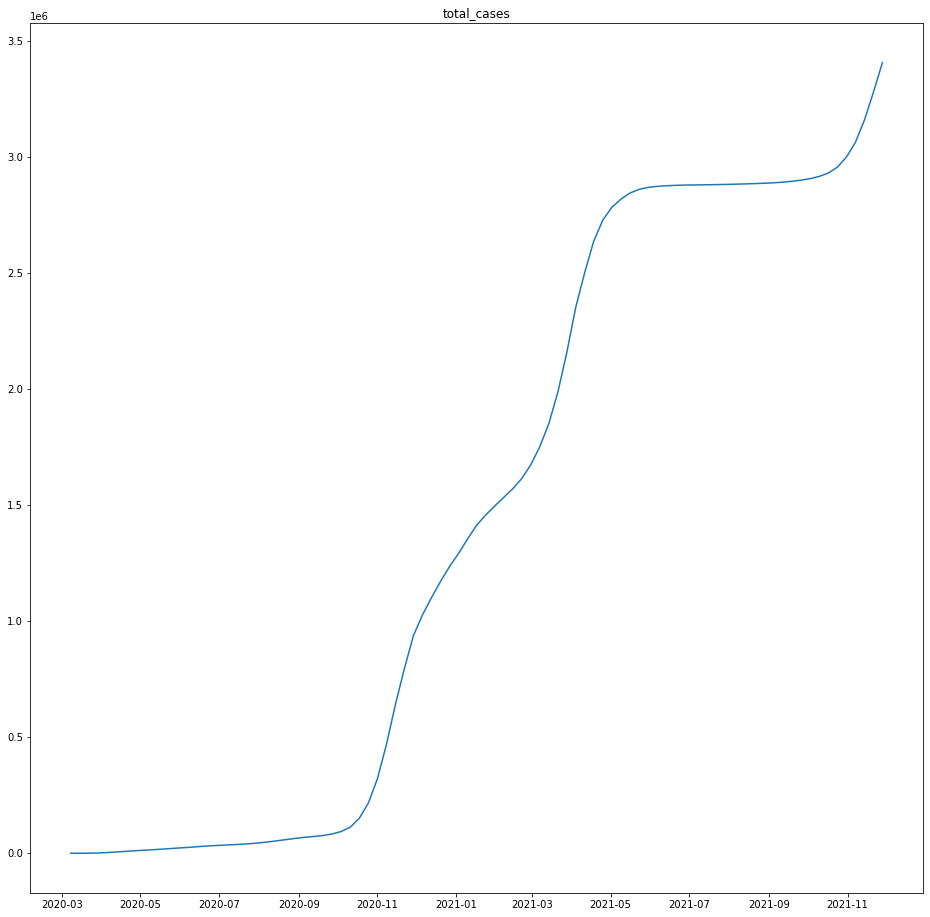

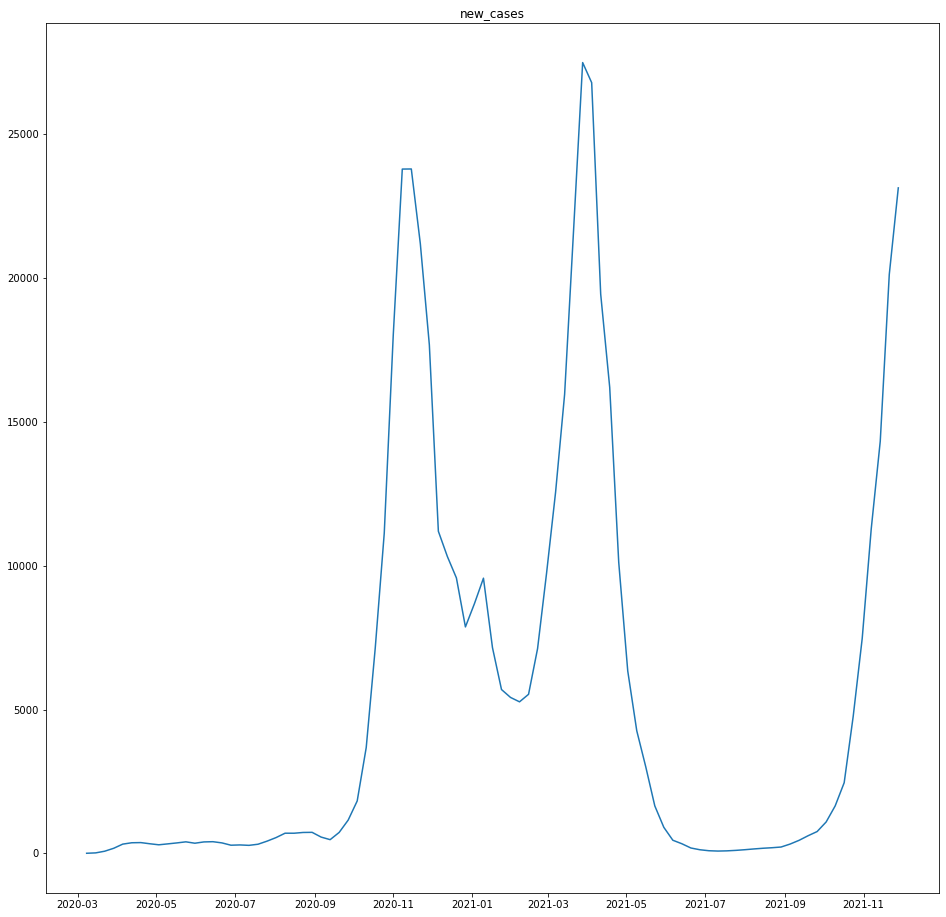

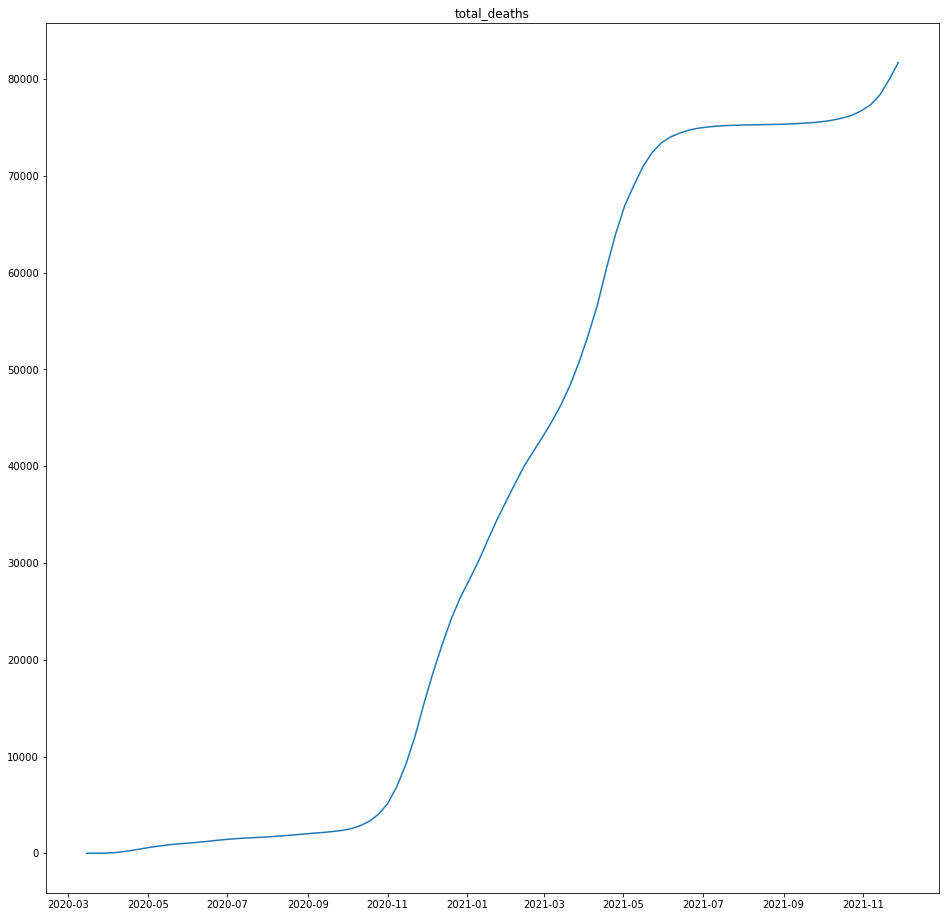

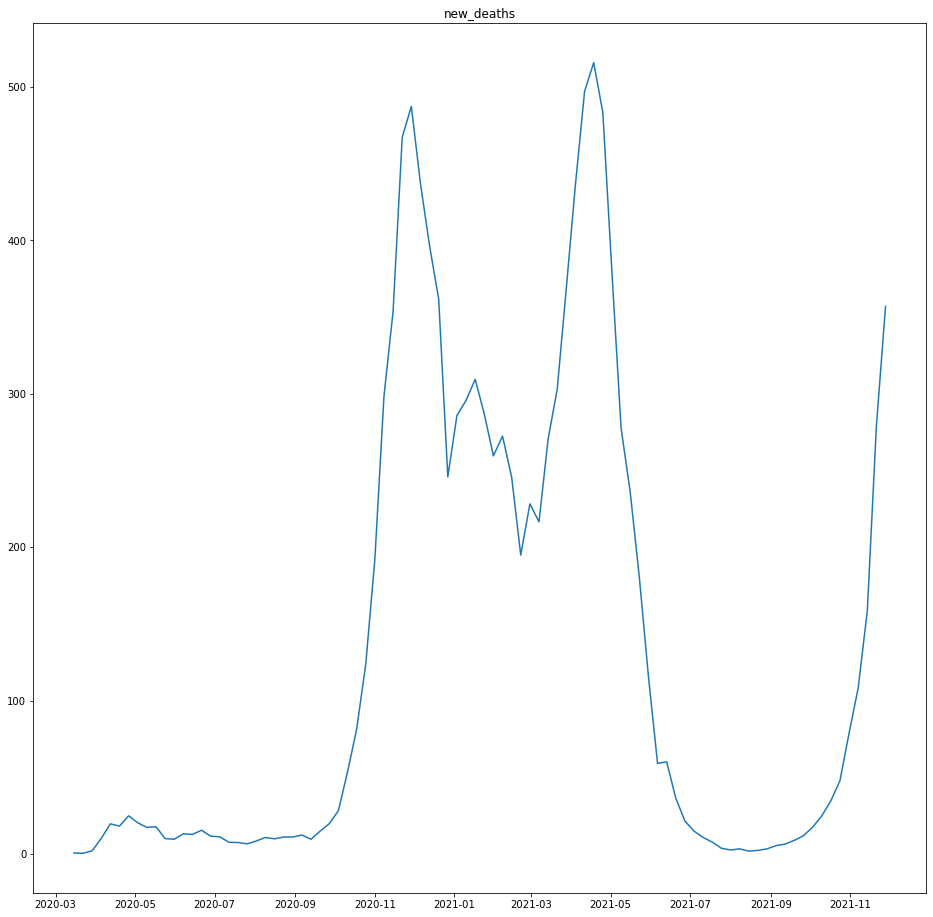

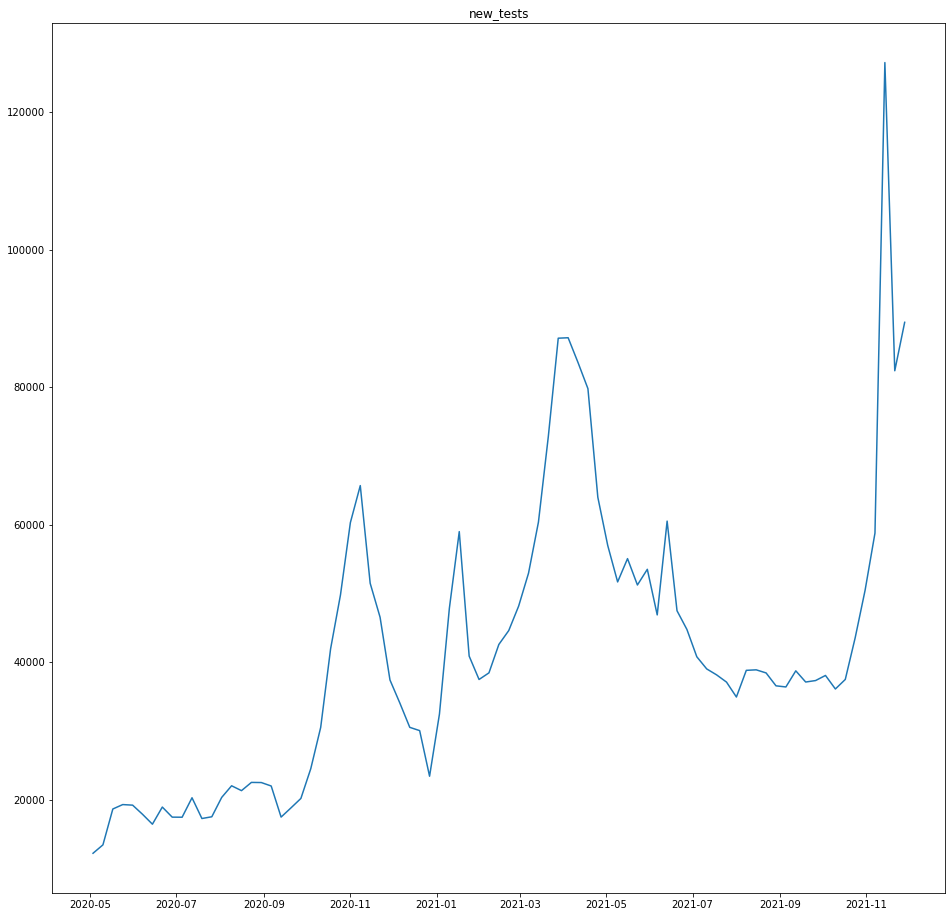

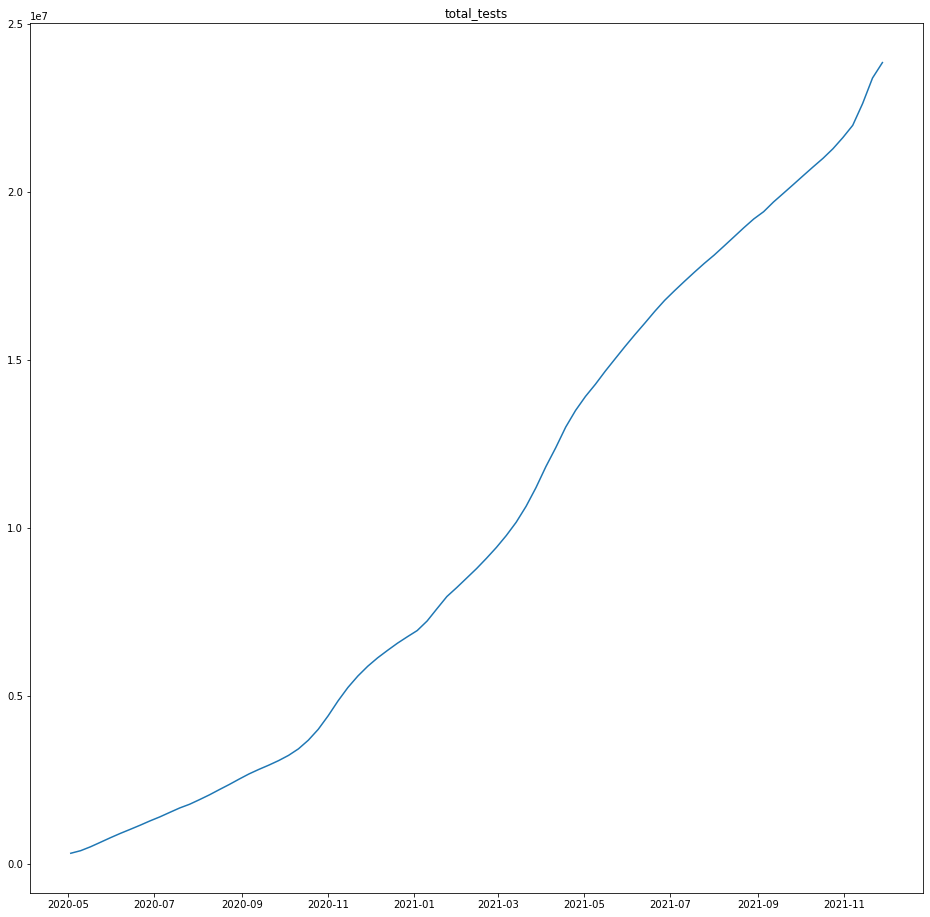

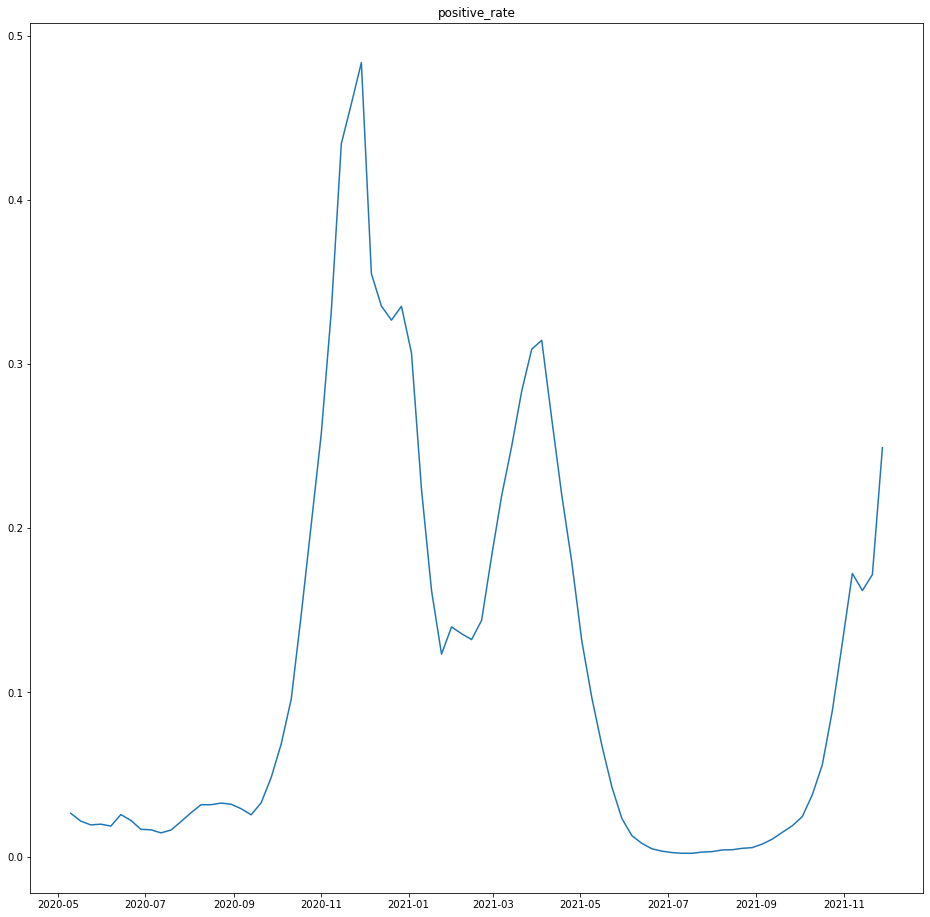

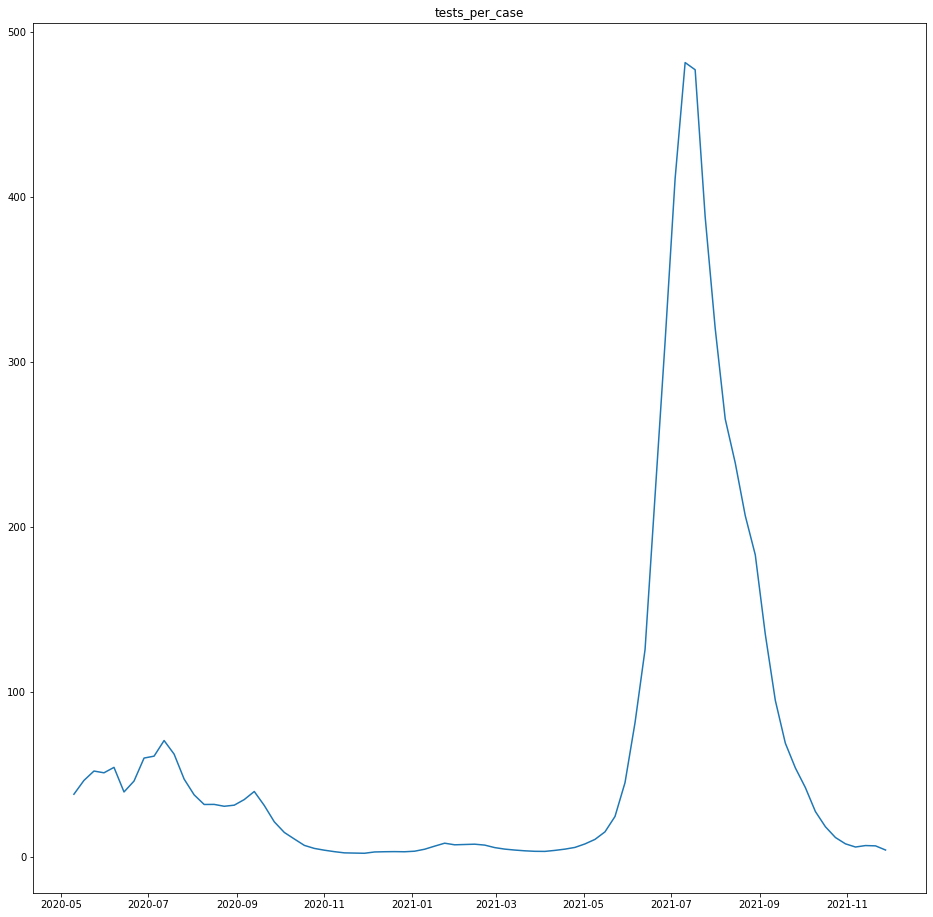

In [48]:
from matplotlib import pyplot as plt
plt.subplots(figsize = (16.0, 16.0))
plt.title('total_cases')
plt.plot(data['total_cases']);
plt.subplots(figsize = (16.0, 16.0))
plt.title('new_cases')
plt.plot(data['new_cases']);
plt.subplots(figsize = (16.0, 16.0))
plt.title('total_deaths')
plt.plot(data['total_deaths']);
plt.subplots(figsize = (16.0, 16.0))
plt.title('new_deaths')
plt.plot(data['new_deaths']);
plt.subplots(figsize = (16.0, 16.0))
plt.title('new_tests')
plt.plot(data['new_tests']);
plt.subplots(figsize = (16.0, 16.0))
plt.title('total_tests')
plt.plot(data['total_tests']);
plt.subplots(figsize = (16.0, 16.0))
plt.title('positive_rate')
plt.plot(data['positive_rate']);
plt.subplots(figsize = (16.0, 16.0))
plt.title('tests_per_case')
plt.plot(data['tests_per_case']);


### Znormalizować zbiór stosując strategię min-max

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_norm

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case
0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000016,0.000481,0.000000,0.000347,NaN,NaN,NaN,NaN
2,0.000108,0.002596,0.000035,0.000000,NaN,NaN,NaN,NaN
3,0.000368,0.006302,0.000154,0.003050,NaN,NaN,NaN,NaN
4,0.000878,0.011561,0.000686,0.018852,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
86,0.880401,0.271817,0.939402,0.151927,0.332504,0.905067,0.266093,0.011924
87,0.899013,0.410328,0.946944,0.209038,0.404963,0.920614,0.353901,0.007900
88,0.927129,0.521134,0.959440,0.306626,1.000000,0.948171,0.332246,0.009748
89,0.962372,0.732011,0.978504,0.540893,0.610245,0.980462,0.352418,0.009360


### Przeliczyć dane w formie tydzień do tygodnia: tzn. liczba nowych zachorowań/liczba nowych zachorowań tydzień temu i wykreślić wykres 2D – na osi x zachorowania w bieżącym tygodniu, na osi y zachorowania tydzień temu, kolorami proszę wyróżnić czas (np. intensywność barwy – nowe dane)

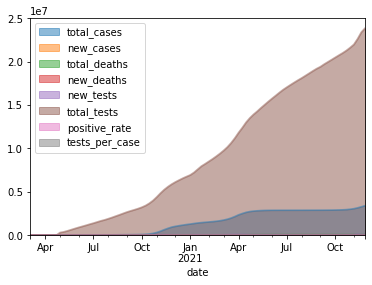

In [67]:
data.plot.area(stacked=False);